# Analisando o Título das Noticias da Espanha

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.text import TSNEVisualizer

import warnings
warnings.filterwarnings('ignore')

from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift

In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/WebScraping-covid+spain.csv'

not_spa = pd.read_csv(url)
not_spa.drop('Unnamed: 0',axis=1,inplace=True)
not_spa.head()

,Titulo,Data,URL da noticia
0,Catalan separatists to break Spain's political...,02-01-2020,https://www.chronicle.gi/catalan-separatists-t...
1,"Jordi Cruyff, el plan B a Robert Moreno de la ...",02-01-2020,https://www.elespanol.com/deportes/futbol/2020...
2,Un hombre de Pontevedra cazado al hacer un 'si...,02-01-2020,https://www.elespanol.com/sociedad/sucesos/202...
3,Una niña de 13 años muere al dar a luz después...,02-01-2020,https://www.elespanol.com/sociedad/sucesos/202...
4,Marlaska confirma la transferencia de Tráfico ...,02-01-2020,https://www.elespanol.com/espana/20200102/marl...


In [ ]:
not_spa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Titulo          8993 non-null   object
 1   Data            8993 non-null   object
 2   URL da noticia  8993 non-null   object
dtypes: object(3)
memory usage: 210.9+ KB


In [ ]:
not_spa['Data'] = pd.to_datetime(not_spa['Data'],format='%d-%m-%Y')
not_spa.head()

,Titulo,Data,URL da noticia
0,Catalan separatists to break Spain's political...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...
1,"Jordi Cruyff, el plan B a Robert Moreno de la ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...
2,Un hombre de Pontevedra cazado al hacer un 'si...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...
3,Una niña de 13 años muere al dar a luz después...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...
4,Marlaska confirma la transferencia de Tráfico ...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...


In [ ]:
not_spa.sort_values(by='Data',inplace=True)
not_spa

,Titulo,Data,URL da noticia
0,Catalan separatists to break Spain's political...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...
1,"Jordi Cruyff, el plan B a Robert Moreno de la ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...
2,Un hombre de Pontevedra cazado al hacer un 'si...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...
3,Una niña de 13 años muere al dar a luz después...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...
4,Marlaska confirma la transferencia de Tráfico ...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...
...,...,...,...
8974,Coronavirus en Argentina: confirmaron 47.663 c...,2021-12-31,https://www.cronista.com/informacion-gral/coro...
8973,El pase sanitario entra en vigencia desde el 1...,2021-12-31,https://www.argentina.gob.ar/noticias/el-pase-...
8991,Australia’s Covid surge in four charts: NSW no...,2021-12-31,https://www.theguardian.com/australia-news/dat...
8981,"Larga la ATP Cup, el nuevo Mundial de tenis, q...",2021-12-31,https://www.clarin.com/deportes/larga-atp-cup-...


In [ ]:
not_spa['Ano'] = not_spa['Data'].dt.year
not_spa['Mes'] = not_spa['Data'].dt.month
not_spa

,Titulo,Data,URL da noticia,Ano,Mes
0,Catalan separatists to break Spain's political...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...,2020,1
1,"Jordi Cruyff, el plan B a Robert Moreno de la ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...,2020,1
2,Un hombre de Pontevedra cazado al hacer un 'si...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
3,Una niña de 13 años muere al dar a luz después...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
4,Marlaska confirma la transferencia de Tráfico ...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...,2020,1
...,...,...,...,...,...
8974,Coronavirus en Argentina: confirmaron 47.663 c...,2021-12-31,https://www.cronista.com/informacion-gral/coro...,2021,12
8973,El pase sanitario entra en vigencia desde el 1...,2021-12-31,https://www.argentina.gob.ar/noticias/el-pase-...,2021,12
8991,Australia’s Covid surge in four charts: NSW no...,2021-12-31,https://www.theguardian.com/australia-news/dat...,2021,12
8981,"Larga la ATP Cup, el nuevo Mundial de tenis, q...",2021-12-31,https://www.clarin.com/deportes/larga-atp-cup-...,2021,12


In [ ]:
# Removendo os stop words das colunas descripion e title
stop = stopwords.words(['spanish','english'])

In [ ]:
not_spa['Titulo'] = not_spa['Titulo'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
not_spa.head()

,Titulo,Data,URL da noticia,Ano,Mes
0,Catalan separatists break Spain's political de...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...,2020,1
1,"Jordi Cruyff, plan B Robert Moreno selección E...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...,2020,1
2,Un hombre Pontevedra cazado hacer 'simpa' Noch...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
3,Una niña 13 años muere dar luz después ser vio...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
4,Marlaska confirma transferencia Tráfico Navarr...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...,2020,1


In [ ]:
# Aplicando lemantização
def lema(coluna):
  lema = []
  wnl = WordNetLemmatizer()
  lista = list(coluna)
  for i in range(len(lista)):
    lista_le = nltk.word_tokenize(lista[i])
    junta = ' '.join([wnl.lemmatize(words) for words in lista_le])
    lema.append(junta)
  coluna = lema
  return coluna

In [ ]:
not_spa['Titulo'] = lema(not_spa['Titulo'])
not_spa.head()

,Titulo,Data,URL da noticia,Ano,Mes
0,Catalan separatist break Spain 's political de...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...,2020,1
1,"Jordi Cruyff , plan B Robert Moreno selección ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...,2020,1
2,Un hombre Pontevedra cazado hacer 'simpa ' Noc...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
3,Una niña 13 años muere dar luz después ser vio...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
4,Marlaska confirma transferencia Tráfico Navarr...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...,2020,1


In [ ]:
not_spa['Titulo'] = not_spa['Titulo'].str.lower()
not_spa.head()

,Titulo,Data,URL da noticia,Ano,Mes
0,catalan separatist break spain 's political de...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...,2020,1
1,"jordi cruyff , plan b robert moreno selección ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...,2020,1
2,un hombre pontevedra cazado hacer 'simpa ' noc...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
3,una niña 13 años muere dar luz después ser vio...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1
4,marlaska confirma transferencia tráfico navarr...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...,2020,1


In [ ]:
juntar_texto = ''.join(s for s in not_spa[not_spa['Ano']==2020]['Titulo'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto)

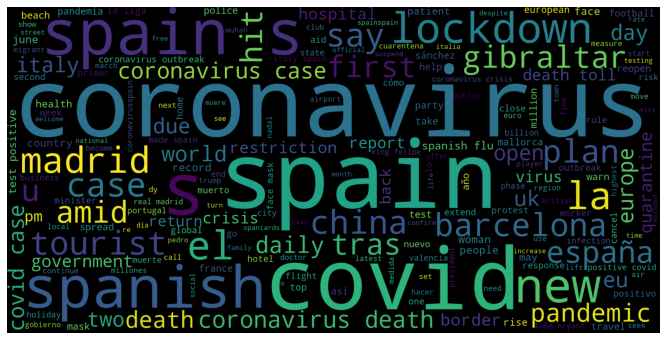

In [ ]:
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

In [ ]:
juntar_texto2 = ''.join(s for s in not_spa[not_spa['Ano']==2021]['Titulo'])
wordcloud2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto2)

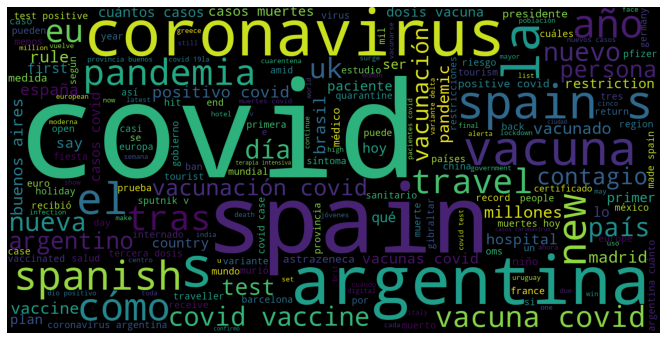

In [ ]:
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud2);

In [ ]:
count_vec = CountVectorizer()
tit_not_ma = count_vec.fit_transform(not_spa['Titulo'])

### Clusterização Com Kmeans

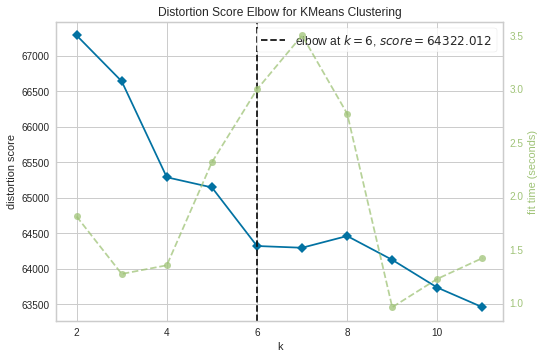

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(tit_not_ma)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tit_not_ma)
not_spa['Cluster'] = kmeans.labels_

In [ ]:
not_spa.head()

,Titulo,Data,URL da noticia,Ano,Mes,Cluster
0,catalan separatist break spain 's political de...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...,2020,1,2
1,"jordi cruyff , plan b robert moreno selección ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...,2020,1,2
2,un hombre pontevedra cazado hacer 'simpa ' noc...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1,2
3,una niña 13 años muere dar luz después ser vio...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1,2
4,marlaska confirma transferencia tráfico navarr...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...,2020,1,2


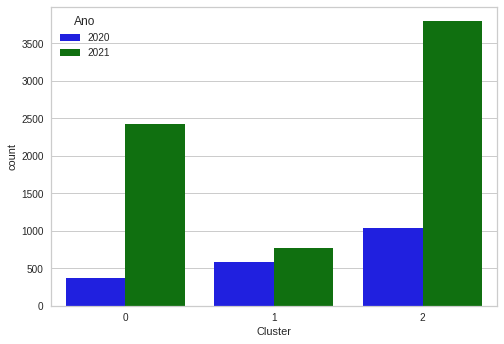

In [ ]:
sns.countplot(x='Cluster',data=not_spa,color='royalblue',hue='Ano',
              palette = ['blue','green'])

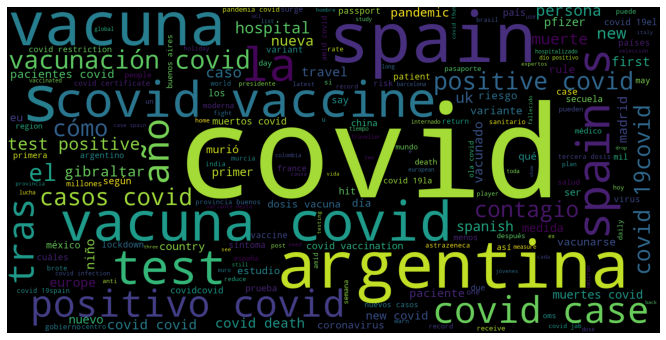

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_spa[not_spa['Cluster']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

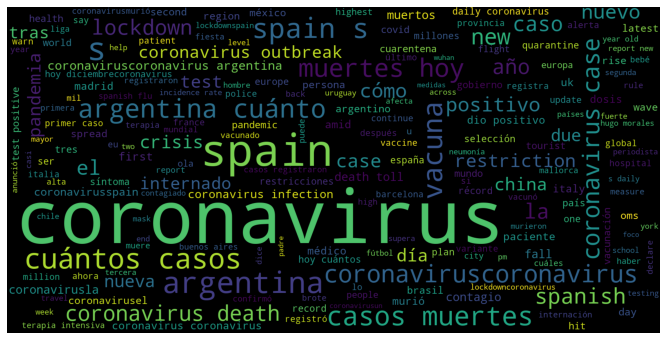

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_spa[not_spa['Cluster']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

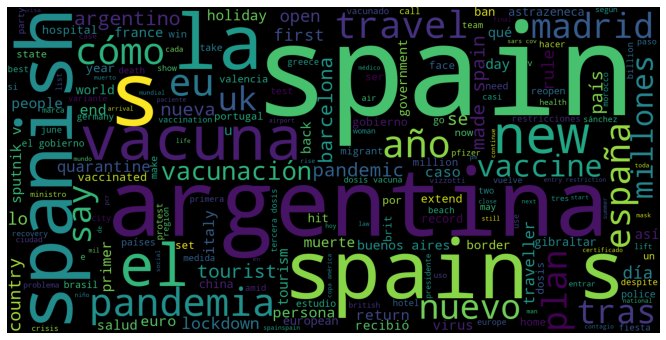

In [ ]:
juntar_texto_cluster_2 = ''.join(s for s in not_spa[not_spa['Cluster']==2]['Titulo'])
wordcloud_cluster_2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_2);

In [ ]:
not_spa['Cluster'] = not_spa['Cluster'].map({0:0,1:1,2:0})

In [ ]:
not_spa.head()

,Titulo,Data,URL da noticia,Ano,Mes,Cluster,Cluster kmedoids
0,catalan separatist break spain 's political de...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...,2020,1,0,0
1,"jordi cruyff , plan b robert moreno selección ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...,2020,1,0,0
2,un hombre pontevedra cazado hacer 'simpa ' noc...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1,0,0
3,una niña 13 años muere dar luz después ser vio...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1,0,0
4,marlaska confirma transferencia tráfico navarr...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...,2020,1,0,0


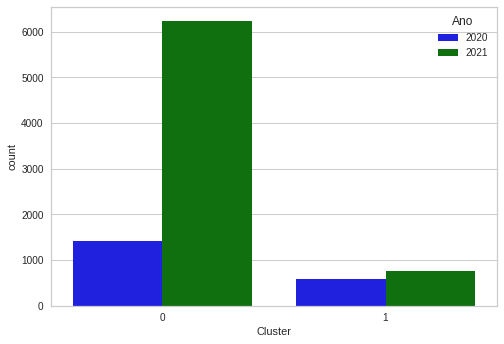

In [ ]:
sns.countplot(x='Cluster',data=not_spa,color='royalblue',hue='Ano',
              palette = ['blue','green'])

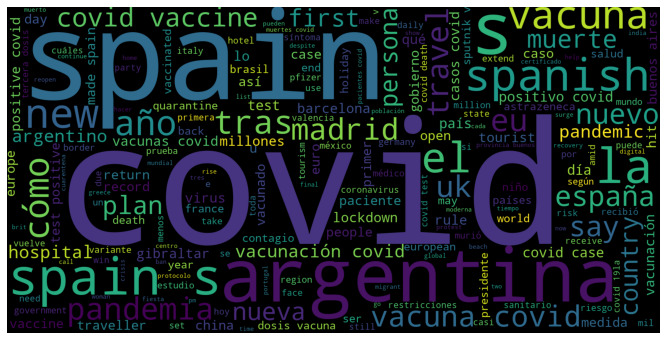

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_spa[not_spa['Cluster']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

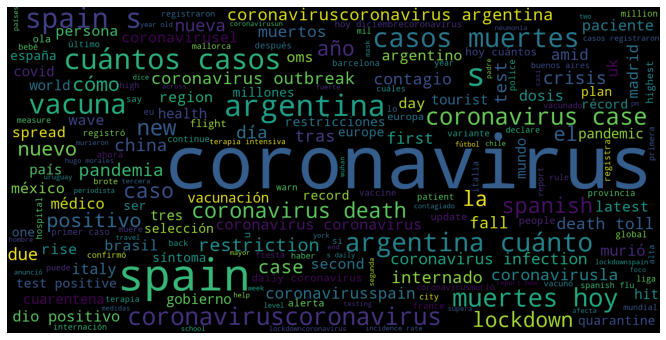

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_spa[not_spa['Cluster']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

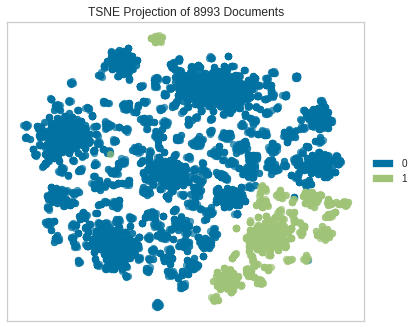

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(tit_not_ma, not_spa.Cluster)
tsne.show()

In [ ]:
not_spa = not_spa[['Titulo','Data','Ano','Cluster']]
not_spa.head()

,Titulo,Data,Ano,Cluster
0,catalan separatist break spain 's political de...,2020-01-02,2020,0
1,"jordi cruyff , plan b robert moreno selección ...",2020-01-02,2020,0
2,un hombre pontevedra cazado hacer 'simpa ' noc...,2020-01-02,2020,0
3,una niña 13 años muere dar luz después ser vio...,2020-01-02,2020,0
4,marlaska confirma transferencia tráfico navarr...,2020-01-02,2020,0


In [ ]:
not_spa.to_csv('Titulos Noticias Espanha com Cluster.csv')

### Kmedoids

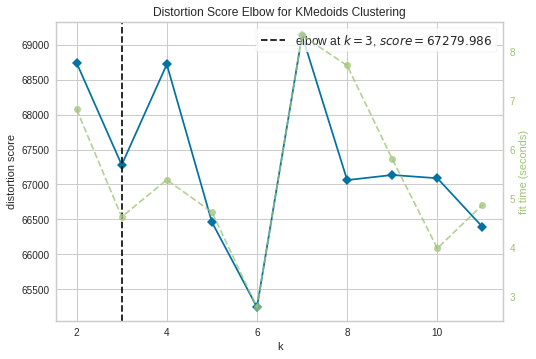

In [ ]:
kmedoids = KMedoids(init='k-medoids++')
visualizer2 = KElbowVisualizer(kmedoids, k=(2,12))
visualizer2.fit(tit_not_ma)
visualizer2.show()

In [ ]:
kmedoids = KMedoids(n_clusters=3,init='k-medoids++')
kmedoids.fit(tit_not_ma)
not_spa['Cluster kmedoids'] = kmedoids.labels_
not_spa.head()

,Titulo,Data,URL da noticia,Ano,Mes,Cluster,Cluster kmedoids
0,catalan separatist break spain 's political de...,2020-01-02,https://www.chronicle.gi/catalan-separatists-t...,2020,1,2,0
1,"jordi cruyff , plan b robert moreno selección ...",2020-01-02,https://www.elespanol.com/deportes/futbol/2020...,2020,1,2,0
2,un hombre pontevedra cazado hacer 'simpa ' noc...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1,2,0
3,una niña 13 años muere dar luz después ser vio...,2020-01-02,https://www.elespanol.com/sociedad/sucesos/202...,2020,1,2,0
4,marlaska confirma transferencia tráfico navarr...,2020-01-02,https://www.elespanol.com/espana/20200102/marl...,2020,1,2,0


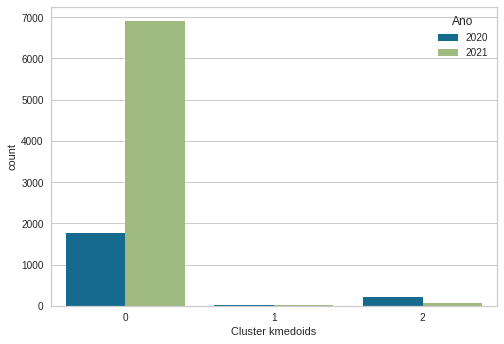

In [ ]:
sns.countplot(x='Cluster kmedoids',data=not_spa,hue='Ano')

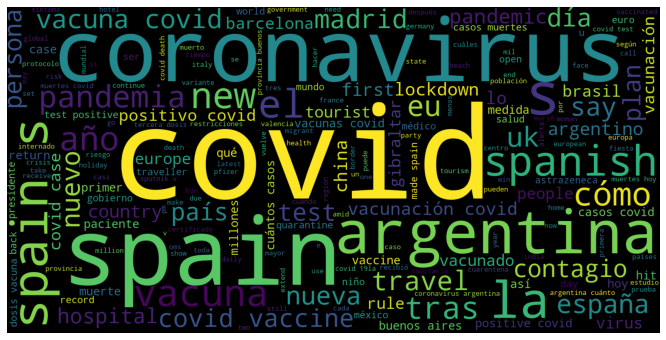

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_spa[not_spa['Cluster kmedoids']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

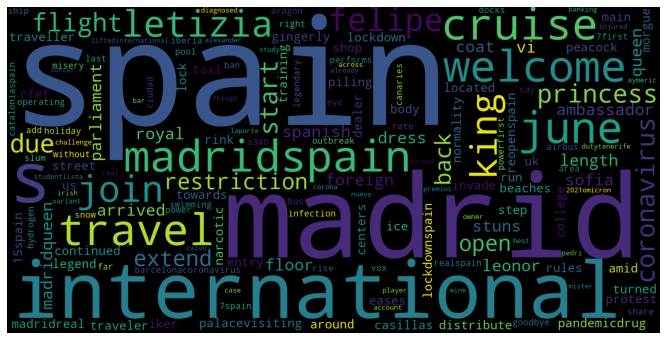

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_spa[not_spa['Cluster kmedoids']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

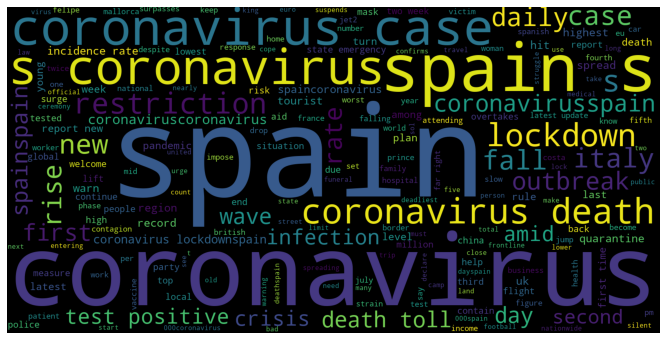

In [ ]:
juntar_texto_cluster_2 = ''.join(s for s in not_spa[not_spa['Cluster kmedoids']==2]['Titulo'])
wordcloud_cluster_2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_2);